In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
path = "/content/drive/Othercomputers/My Laptop/HAMOYE/Stage B/Quiz/energydata_complete.csv"

In [3]:
en_df = pd.read_csv(path)

In [4]:
en_df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [5]:
columns = {
    "T1" : "Temp_kitchen", "RH_1" : "Hum_kitchen", "T2" : "Temp_living_room",
    "RH_2" : "Hum_living_room", "T3" : "Temp_laundry_room", "RH_3" : "Hum_aundry_room",
    "T4" : "Temp_office_room", "RH_4" : "Hum_office_room", "T5" : "Temp_bathroom", 
    "RH_5" : "Hum_bathroom", "T6" : "Temp_out(NS)", "RH_6" : "Hum_out(NS)", 
    "T7" : "Temp_ironing_room", "RH_7" : "Hum_ironing_room", "T8" : "Temp_teenager_room", 
    "RH_8" : "Hum_teenager_room", "T9" : "Temp_parents_room", "RH_9" : "Hum_parents_room", 
    "T_out" : "Temp_out(CWS)", "Press_mm_hg" : "Press_mm_hg(CWS)", "RH_out" : "RH_out(CWS)", 
    "Windspeed" : "Windspeed(CWS)", "Visibility" : "Visibility(CWS)", "Tdewpoint" : "Tdewpoint(CWS)", 
    "rv1" : "random_var_1", "rv2" : "random_var_2"
}

In [6]:
en_df = en_df.rename(columns = columns)

In [7]:
en_df.head(2)

,date,Appliances,lights,Temp_kitchen,Hum_kitchen,Temp_living_room,Hum_living_room,Temp_laundry_room,Hum_aundry_room,Temp_office_room,Hum_office_room,Temp_bathroom,Hum_bathroom,Temp_out(NS),Hum_out(NS),Temp_ironing_room,Hum_ironing_room,Temp_teenager_room,Hum_teenager_room,Temp_parents_room,Hum_parents_room,Temp_out(CWS),Press_mm_hg(CWS),RH_out(CWS),Windspeed(CWS),Visibility(CWS),Tdewpoint(CWS),random_var_1,random_var_2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.7900,19.79,44.73,19.0,45.566667,17.166667,55.2,7.026667,84.256667,17.2,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.7225,19.79,44.79,19.0,45.992500,17.166667,55.2,6.833333,84.063333,17.2,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195


In [8]:
en_df.shape

(19735, 29)

In [9]:
en_df.isnull().sum().sum()

0

In [10]:
en_df.dtypes

date                   object
Appliances              int64
lights                  int64
Temp_kitchen          float64
Hum_kitchen           float64
Temp_living_room      float64
Hum_living_room       float64
Temp_laundry_room     float64
Hum_aundry_room       float64
Temp_office_room      float64
Hum_office_room       float64
Temp_bathroom         float64
Hum_bathroom          float64
Temp_out(NS)          float64
Hum_out(NS)           float64
Temp_ironing_room     float64
Hum_ironing_room      float64
Temp_teenager_room    float64
Hum_teenager_room     float64
Temp_parents_room     float64
Hum_parents_room      float64
Temp_out(CWS)         float64
Press_mm_hg(CWS)      float64
RH_out(CWS)           float64
Windspeed(CWS)        float64
Visibility(CWS)       float64
Tdewpoint(CWS)        float64
random_var_1          float64
random_var_2          float64
dtype: object

**Question 12**

In [11]:
slr_en_df = en_df[["Temp_living_room", "Temp_out(NS)"]].sample(20, random_state = 2)

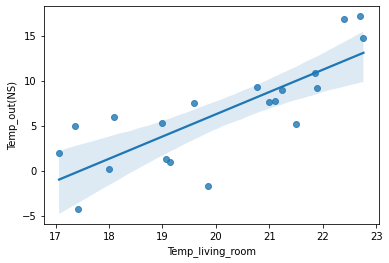

In [12]:
sns.regplot(x = "Temp_living_room", y = "Temp_out(NS)", data = slr_en_df)

In [21]:
en_df['date'] = en_df['date'].apply(lambda x: float(x.split()[0].replace('-', '')))

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_en_df = pd.DataFrame(scaler.fit_transform(en_df), columns=en_df.columns)
features_en_df = normalised_en_df.drop(columns=['Temp_living_room' , 'Temp_out(NS)'])
heating_target = normalised_en_df['Temp_living_room']

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_en_df, heating_target,
test_size= 0.3 , random_state= 42 )

In [29]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(x_train, y_train) #model training
predicted_values = linear_model.predict(x_test) #predictions

In [30]:
#R^2
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 2)

0.96

In [31]:
#Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 2)


0.02

In [33]:
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 2)

5.92

In [34]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.032

In [36]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 2)

0.96

In [37]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha= 0.5 )
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.5)

In [38]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha= 0.001 )
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

In [39]:
def get_weights_df(model, feat, col_name):
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weights_df = pd.DataFrame(weights).reset_index()
  weights_df.columns = ['Features' , col_name]
  weights_df[col_name].round(3)
  return weights_df


In [40]:
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
#The linear_model can be replaced with any model e.g Lasso, ridge_reg etc
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')

In [41]:
final_weights = pd.merge(linear_model_weights, ridge_weights_df, on= 'Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on= 'Features')

In [43]:
final_weights.describe()

,Linear_Model_Weight,Ridge_Weight,Lasso_weight
count,27.000000,27.000000,27.000000
mean,0.018441,0.018257,0.022513
std,0.278143,0.271308,0.149688
min,-1.091490,-1.068615,-0.535936
25%,-0.020791,-0.020324,0.000000
50%,0.000799,0.001796,0.000000
75%,0.063240,0.061928,-0.000000
max,0.706847,0.674481,0.427965
